In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pathlib import Path
import scipy as stats
import numpy as np
import hvplot.pandas
from scipy.stats import chi2_contingency



In [245]:
restaurantpath= Path("restaurant_data.csv")
restaurantfile=pd.read_csv(restaurantpath,encoding="UTF-8")
restaurantfile


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
1,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
2,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
3,40944945,Stage 42,Manhattan,422,WEST 42 STREET,10036.0,2125867610,American,09/24/2015,Establishment re-opened by DOHMH.,...,Cycle Inspection / Reopening Inspection,40.758823,-73.993607,104.0,3.0,11500.0,1087184.0,1.010518e+09,MN15,NaN
4,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN
1423,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Smoke-Free Air Act / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN
1424,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN
1425,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN


In [246]:
restaurantfile.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

In [247]:
 # Define subset of columns to consider for duplicates
restaurantfile['CAMIS'].value_counts()

CAMIS
40398688    20
41087273    18
41493226    17
40716625    15
41611709    15
            ..
40600853     1
50017147     1
50019038     1
41688136     1
41611748     1
Name: count, Length: 405, dtype: int64

In [248]:
#Delete unnessecary columns
restaurants_to_keep=['CAMIS','BORO','DBA', 'ZIPCODE','ACTION','CUISINE DESCRIPTION','INSPECTION DATE','GRADE', 'VIOLATION CODE']
restaurantfile=restaurantfile[restaurants_to_keep].copy()
#restaruantfile = restaruantfile.drop(columns=['BUILDING','STREET', 'PHONE', 'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA', 'RECORD DATE', 'GRADE DATE'])
restaurantfile.head()

,CAMIS,BORO,DBA,ZIPCODE,ACTION,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,VIOLATION CODE
0,50041177,Brooklyn,FIRSTLIVE STUDIO,11221.0,Violations were cited in the following area(s).,Other,09/24/2015,NaN,10H
1,50041177,Brooklyn,FIRSTLIVE STUDIO,11221.0,Violations were cited in the following area(s).,Other,09/24/2015,NaN,04J
2,50041177,Brooklyn,FIRSTLIVE STUDIO,11221.0,Violations were cited in the following area(s).,Other,09/24/2015,NaN,05D
3,40944945,Manhattan,Stage 42,10036.0,Establishment re-opened by DOHMH.,American,09/24/2015,P,10B
4,50041177,Brooklyn,FIRSTLIVE STUDIO,11221.0,Violations were cited in the following area(s).,Other,09/24/2015,NaN,20D


In [249]:
#Drop restaurants that don't have a grade (i.e., NaN) from the dataframe
#query_df['grade'].unique()
clean_grade_df = restaurantfile.dropna(subset=['GRADE'])

In [250]:
#getting unique value lists which should be helpful later when making calls. this syntax can work for any column.
clean_grade_df['CUISINE DESCRIPTION'].unique().tolist()
clean_grade_df['BORO'].unique().tolist()

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

In [251]:
#the code worked but i think we will have to run the dates through that filter code to get it sorted. I am holdingoff until class to do this.
clean_grade_df.sort_values('INSPECTION DATE',ascending=False)
clean_grade_df.head()

,CAMIS,BORO,DBA,ZIPCODE,ACTION,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,VIOLATION CODE
3,40944945,Manhattan,Stage 42,10036.0,Establishment re-opened by DOHMH.,American,09/24/2015,P,10B
5,40944945,Manhattan,Stage 42,10036.0,Violations were cited in the following area(s).,American,10/14/2015,A,10F
6,40944945,Manhattan,Stage 42,10036.0,Violations were cited in the following area(s).,American,10/14/2015,A,10B
8,50015538,Manhattan,AMERICAN AIRLINES THEATER,10036.0,Violations were cited in the following area(s).,American,11/19/2015,A,10B
9,50015538,Manhattan,AMERICAN AIRLINES THEATER,10036.0,Violations were cited in the following area(s).,American,11/19/2015,A,05D


In [252]:
#Format dates, adds a date column, fills NaN, get rid of decimal in zip code
clean_grade_df['INSPECTION DATE'] = pd.to_datetime(clean_grade_df['INSPECTION DATE']).dt.date
clean_grade_df['Date']=clean_grade_df['INSPECTION DATE']
clean_grade_df['ZIPCODE'].fillna(-1,inplace=True)
clean_grade_df['ZIPCODE'] = clean_grade_df['ZIPCODE'].astype(int)
clean_grade_df

C:\Users\katha\AppData\Local\Temp\ipykernel_19068\2964346001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_grade_df['INSPECTION DATE'] = pd.to_datetime(clean_grade_df['INSPECTION DATE']).dt.date
C:\Users\katha\AppData\Local\Temp\ipykernel_19068\2964346001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_grade_df['Date']=clean_grade_df['INSPECTION DATE']
C:\Users\katha\AppData\Local\Temp\ipykernel_19068\2964346001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,CAMIS,BORO,DBA,ZIPCODE,ACTION,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,VIOLATION CODE,Date
3,40944945,Manhattan,Stage 42,10036,Establishment re-opened by DOHMH.,American,2015-09-24,P,10B,2015-09-24
5,40944945,Manhattan,Stage 42,10036,Violations were cited in the following area(s).,American,2015-10-14,A,10F,2015-10-14
6,40944945,Manhattan,Stage 42,10036,Violations were cited in the following area(s).,American,2015-10-14,A,10B,2015-10-14
8,50015538,Manhattan,AMERICAN AIRLINES THEATER,10036,Violations were cited in the following area(s).,American,2015-11-19,A,10B,2015-11-19
9,50015538,Manhattan,AMERICAN AIRLINES THEATER,10036,Violations were cited in the following area(s).,American,2015-11-19,A,05D,2015-11-19
...,...,...,...,...,...,...,...,...,...,...
1393,50000360,Queens,CB CHARISMA BALLROOM,11367,Violations were cited in the following area(s).,Other,2017-12-18,A,08A,2017-12-18
1396,50000360,Queens,CB CHARISMA BALLROOM,11367,Violations were cited in the following area(s).,Other,2017-12-18,A,04L,2017-12-18
1403,41251712,Queens,UNDERGROUND LOUNGE,11419,Violations were cited in the following area(s).,Caribbean,2017-12-21,A,06D,2017-12-21
1409,41251712,Queens,UNDERGROUND LOUNGE,11419,Violations were cited in the following area(s).,Caribbean,2017-12-21,A,06C,2017-12-21


In [253]:
#Need denominator to be unique restaurants
clean_grade_unique=clean_grade_df.drop_duplicates(subset=['CAMIS'])
clean_grade_unique.reset_index(drop=True, inplace=True)
clean_grade_unique

,CAMIS,BORO,DBA,ZIPCODE,ACTION,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,VIOLATION CODE,Date
0,40944945,Manhattan,Stage 42,10036,Establishment re-opened by DOHMH.,American,2015-09-24,P,10B,2015-09-24
1,50015538,Manhattan,AMERICAN AIRLINES THEATER,10036,Violations were cited in the following area(s).,American,2015-11-19,A,10B,2015-11-19
2,50015171,Manhattan,NEW AMSTERDAM THEATER,10036,Violations were cited in the following area(s).,American,2015-11-20,A,06C,2015-11-20
3,50041177,Brooklyn,FIRSTLIVE STUDIO,11221,Violations were cited in the following area(s).,Other,2016-01-21,A,10H,2016-01-21
4,41589635,Manhattan,PRODUCERS LOUNGE,10036,Violations were cited in the following area(s).,American,2016-03-11,A,06D,2016-03-11
...,...,...,...,...,...,...,...,...,...,...
367,41611698,Queens,WINNER'S CIRCLE COFFEE SHOP,11420,Violations were cited in the following area(s).,American,2017-11-09,A,10F,2017-11-09
368,41681923,Manhattan,MIST HARLEM,10026,Violations were cited in the following area(s).,American,2017-11-27,B,10F,2017-11-27
369,50062880,Manhattan,ONE LENOX,10065,Violations were cited in the following area(s).,American,2017-12-04,A,06E,2017-12-04
370,41591307,Queens,FORTUNE COOKIE,11420,Violations were cited in the following area(s).,Chinese,2017-12-05,A,10F,2017-12-05


In [254]:
# QUESTION 1: How many unique A, B, C restaurants were there in New York City from September 2010-September 2017?
gradecountscitywide=clean_grade_unique['GRADE'].value_counts()
gradecountscitywide

GRADE
A    349
B     14
C      7
P      1
N      1
Name: count, dtype: int64

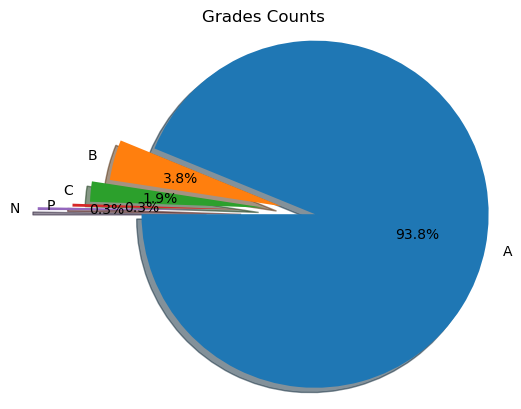

In [255]:
#Grades by count pie chart:
explode = (0.1, 0.1, 0.2, 0.3,0.5)

#Pie chart
plt.pie(gradecountscitywide,explode=explode, labels='ABCPN',
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Grades Counts')
plt.axis("equal")
plt.show()

In [256]:
#QUESTION 1a: Is there an association between resaurant cuisine and rating?
# Extract unique cuisine descriptions
cuisinedescriptions = clean_grade_unique['CUISINE DESCRIPTION'].unique()
cuisinedescriptions

array(['American', 'Other', 'Korean', 'Latin American', 'Frozen Desserts',
       'Hotdogs', 'Pizza', 'French', 'Bottled Beverages', 'Italian',
       'Tex-Mex', 'Japanese', 'Spanish', 'Coffee/Tea', 'Mediterranean',
       'Caribbean', 'Middle Eastern', 'German', 'Hamburgers',
       'Sandwiches/Salads/Mixed Buffet', 'Vegan', 'Bagels/Pretzels',
       'Jewish/Kosher', 'Filipino', 'Indian', 'Sandwiches', 'Seafood',
       'Chinese', 'Eastern European', 'Donuts', 'Soups/Salads/Sandwiches',
       'Juice, Smoothies, Fruit Salads', 'African', 'Russian', 'Mexican',
       'Steakhouse', 'Irish', 'Ethiopian'], dtype=object)

In [257]:
# Pare down list of cuisines for Chi-Square test

# Define a mapping dictionary for collapsing cuisines
cuisine_mapping = {
    'American': 'American',
    'Other': 'Other',
    'Korean': 'Asian',
    'Mexican': 'Latin American',
    'Latin American': 'Latin American',
    'Frozen Desserts': 'Desserts/Baked Goods',
    'Hotdogs': 'Fast Food',
    'Pizza': 'Pizza',
    'French':'European',
    'Bottled Beverages':'Coffee/Tea/Beverages',
    'Italian':'Italian',
    'Tex-Mex':'Latin American',
    'Japanese':'Asian',
    'Spanish':'European',
    'Coffee/Tea':'Coffee/Tea/Beverages',
    'Mediterranean':'European',
    'Caribbean':'Caribbean',
    'Middle Eastern': 'Middle Eastern',
    'German':'European',
    'Hamburgers':'Fast Food',
    'Sandwiches/Salads/Mixed Buffet':'Deli',
    'Vegan':'Special Diet',
    'Bagels/Pretzels':'Deli',
    'Jewish/Kosher':'Special Diet',
    'Filipino':'Asian',
    'Indian':'Indian',
    'Sandwiches':'Deli',
    'Seafood':'Seafood',
    'Chinese':'Asian',
    'Eastern European':'European',
    'Donuts':'Desserts/Baked Goods',
    'Soups/Salads/Sandwiches':'Deli',
    'Juice, Smoothies, Fruit Salads':'Juices/Smoothies',
    'African':'African',
    'Russian':'European',
    'Ethiopian':'African',
    'Mexican':'Latin American',
    'Steakhouse':'Steakhouse',
    'Irish':'European'
}

# Replace values in the 'CUISINES' column using the mapping dictionary
clean_grade_unique['CollapsedCUISINES'] = clean_grade_unique['CUISINE DESCRIPTION'].replace(cuisine_mapping)

cuisinedescriptionsnew = clean_grade_unique['CollapsedCUISINES'].unique()
cuisinedescriptionsnew

C:\Users\katha\AppData\Local\Temp\ipykernel_19068\4286208350.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_grade_unique['CollapsedCUISINES'] = clean_grade_unique['CUISINE DESCRIPTION'].replace(cuisine_mapping)


array(['American', 'Other', 'Asian', 'Latin American',
       'Desserts/Baked Goods', 'Fast Food', 'Pizza', 'European',
       'Coffee/Tea/Beverages', 'Italian', 'Caribbean', 'Middle Eastern',
       'Deli', 'Special Diet', 'Indian', 'Seafood', 'Juices/Smoothies',
       'African', 'Steakhouse'], dtype=object)

In [258]:
# Is there an association between restaurant type and rating? -Chi-Square
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pd.crosstab(clean_grade_unique['CollapsedCUISINES'], clean_grade_unique['GRADE']))

print("Chi-square test statistic:", chi2)
print(f"p-value: {p:.5f}")
print("Degress of Freedom:", dof)

cuisinebyratingdf=pd.crosstab(clean_grade_unique['CollapsedCUISINES'], clean_grade_unique['GRADE'])
cuisinebyratingdf

Chi-square test statistic: 83.92047656181035
p-value: 0.15910
Degress of Freedom: 72


GRADE,A,B,C,N,P
CollapsedCUISINES,,,,,
African,2,0,0,0,0
American,240,5,2,1,1
Asian,16,2,1,0,0
Caribbean,3,1,0,0,0
Coffee/Tea/Beverages,18,1,1,0,0
Deli,11,0,0,0,0
Desserts/Baked Goods,5,0,0,0,0
European,8,2,1,0,0
Fast Food,11,0,0,0,0


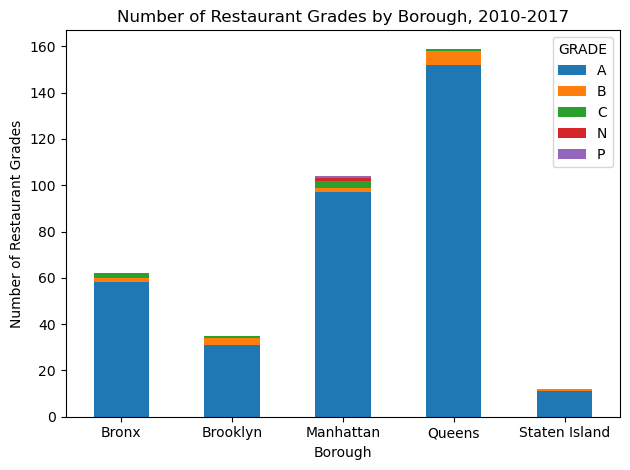

In [259]:
# QUESTION 3: Number of grades by Borough among unique restaurants
gradecounts= clean_grade_unique.groupby(['BORO', 'GRADE']).size().reset_index(name='count')

Boroughs = gradecounts['BORO']
counts = gradecounts['count']
grades = gradecounts['GRADE']

transposecounts = gradecounts.pivot(index='BORO', columns='GRADE', values='count').fillna(0)

transposecounts.plot(kind='bar', stacked=True)
plt.xlabel('Borough')
plt.ylabel('Number of Restaurant Grades')
plt.title('Number of Restaurant Grades by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [260]:
# Is there an association between Borough and rating? -Chi-Square
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pd.crosstab(clean_grade_unique['GRADE'], clean_grade_unique['BORO']))

print("Chi-square test statistic:", chi2)
print(f"p-value: {p:.5f}")
print("Degress of Freedom:", dof)

gradebyboro=pd.crosstab(clean_grade_unique['GRADE'], clean_grade_unique['BORO'])
gradebyboro


Chi-square test statistic: 11.99938993883263
p-value: 0.74402
Degress of Freedom: 16


BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island
GRADE,,,,,
A,58,31,97,152,11
B,2,3,2,6,1
C,2,1,3,1,0
N,0,0,1,0,0
P,0,0,1,0,0


In [261]:

crestaurants=clean_grade_unique.loc[clean_grade_unique['GRADE']=='C']
crestaurants
#italian_df=clean_grade_unique.loc[clean_grade_unique['CUISINE DESCRIPTION']=='Italian']
#italian_df.loc[italian_df['GRADE']=='C']

,CAMIS,BORO,DBA,ZIPCODE,ACTION,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,VIOLATION CODE,Date,CollapsedCUISINES
109,50050112,Queens,MCFADDENS,11368,Violations were cited in the following area(s).,American,2016-09-02,C,04H,2016-09-02,American
139,50050878,Manhattan,"COLUMBIA UNIVERSITY BAKER ATHLETICS COMPLEX, S...",10034,Violations were cited in the following area(s).,Coffee/Tea,2016-11-12,C,05H,2016-11-12,Coffee/Tea/Beverages
236,40398688,Brooklyn,MASTER WOK,11234,Establishment re-opened by DOHMH.,Chinese,2017-06-02,C,08A,2017-06-02,Asian
262,40482600,Manhattan,WINTER GARDEN THEATER,10019,Violations were cited in the following area(s).,American,2017-07-05,C,10B,2017-07-05,American
336,50057780,Bronx,KEANE'S BAR & RESTAURANT,10470,Violations were cited in the following area(s).,Irish,2017-08-29,C,06D,2017-08-29,European
354,41657014,Manhattan,PICCOLO CAFE,10023,Violations were cited in the following area(s).,Italian,2017-10-13,C,06D,2017-10-13,Italian
357,40397574,Bronx,DOMINICK'S BAR & RESTAURANT,10458,Violations were cited in the following area(s).,Italian,2017-10-23,C,04M,2017-10-23,Italian


In [262]:
actions=restaurantfile['ACTION'].unique()
actions

array(['Violations were cited in the following area(s).',
       'Establishment re-opened by DOHMH.',
       'No violations were recorded at the time of this inspection.',
       'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.'],
      dtype=object)

In [263]:
closedrestaurants=restaurantfile.loc[restaurantfile['ACTION']=='Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.']
closedrestaurants

,CAMIS,BORO,DBA,ZIPCODE,ACTION,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,VIOLATION CODE
677,40398688,Brooklyn,MASTER WOK,11234.0,Establishment Closed by DOHMH. Violations were...,Chinese,05/22/2017,NaN,04L
678,40398688,Brooklyn,MASTER WOK,11234.0,Establishment Closed by DOHMH. Violations were...,Chinese,05/22/2017,NaN,02B
679,40398688,Brooklyn,MASTER WOK,11234.0,Establishment Closed by DOHMH. Violations were...,Chinese,05/22/2017,NaN,08A
680,40398688,Brooklyn,MASTER WOK,11234.0,Establishment Closed by DOHMH. Violations were...,Chinese,05/22/2017,NaN,04M
690,40398688,Brooklyn,MASTER WOK,11234.0,Establishment Closed by DOHMH. Violations were...,Chinese,05/26/2017,NaN,04H
691,40398688,Brooklyn,MASTER WOK,11234.0,Establishment Closed by DOHMH. Violations were...,Chinese,05/26/2017,NaN,08A
692,40398688,Brooklyn,MASTER WOK,11234.0,Establishment Closed by DOHMH. Violations were...,Chinese,05/26/2017,NaN,04L
695,40398688,Brooklyn,MASTER WOK,11234.0,Establishment Closed by DOHMH. Violations were...,Chinese,05/26/2017,NaN,04M



Merged DataFrame with Division:
         borough  Violations_per_Restaurant
0      Manhattan                   2.423077
1       Brooklyn                   2.600000
2         Queens                   2.333333
3          Bronx                   1.919355
4  Staten Island                   2.416667


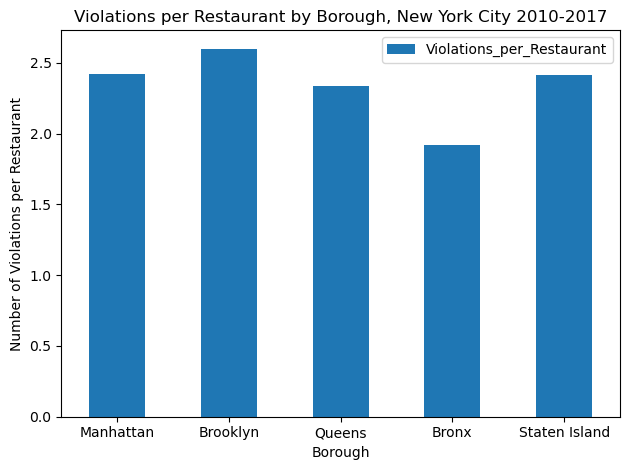

In [264]:
#QUESTION 3A. Do certain boroughs have more restaurant violations? Violations per restaurant by borough
violationcount= clean_grade_df.groupby(['BORO']).size().reset_index(name='count')

camis_df1 = pd.DataFrame({
    'borough': ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
    'Count': [104, 35, 159, 62, 12]
})

violation_df2 = pd.DataFrame({
    'borough': ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
    'Count': [252, 91, 371, 119, 29]
})

#Merge the DataFrames on 'borough'
merged_df = pd.merge(camis_df1, violation_df2, on='borough', suffixes=('_restaurants', '_violations'))

#Perform the division
merged_df['Violations_per_Restaurant'] = merged_df['Count_violations'] / merged_df['Count_restaurants']

#Drop columns
merged_df.drop(['Count_restaurants', 'Count_violations'], axis=1, inplace=True)

#Display the result
print("\nMerged DataFrame with Division:")
print(merged_df)

merged_df.plot(kind='bar', x='borough', y='Violations_per_Restaurant')
plt.xlabel('Borough')
plt.ylabel('Number of Violations per Restaurant')
plt.title('Violations per Restaurant by Borough, New York City 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [265]:
clean_grade_df.head()

,CAMIS,BORO,DBA,ZIPCODE,ACTION,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,VIOLATION CODE,Date
3,40944945,Manhattan,Stage 42,10036,Establishment re-opened by DOHMH.,American,2015-09-24,P,10B,2015-09-24
5,40944945,Manhattan,Stage 42,10036,Violations were cited in the following area(s).,American,2015-10-14,A,10F,2015-10-14
6,40944945,Manhattan,Stage 42,10036,Violations were cited in the following area(s).,American,2015-10-14,A,10B,2015-10-14
8,50015538,Manhattan,AMERICAN AIRLINES THEATER,10036,Violations were cited in the following area(s).,American,2015-11-19,A,10B,2015-11-19
9,50015538,Manhattan,AMERICAN AIRLINES THEATER,10036,Violations were cited in the following area(s).,American,2015-11-19,A,05D,2015-11-19


In [266]:
#3a. Do certain Boroughs have more restaurant violations? -Chi square test
#Calculate number of violations per restaurant
violationsperrestaurant = clean_grade_df.groupby('CAMIS')['VIOLATION CODE'].nunique().reset_index()
#rename columns and create dataframe, now for each restaurant, we have a variable with their number of violations
violationsperrestaurant.columns = ['CAMIS', 'violationsperrestaurant']
violationsperrestaurant_df = pd.DataFrame(violationsperrestaurant)
violationsperrestaurant_df


,CAMIS,violationsperrestaurant
0,40364858,3
1,40368022,1
2,40368026,1
3,40371614,2
4,40376493,2
...,...,...
367,50062880,2
368,50063017,1
369,50064971,2
370,50065115,2


In [267]:
#Merge with the original dataset showing unique restaurant with their number of violations
clean_grade_unique2 = clean_grade_unique.merge(violationsperrestaurant_df, on='CAMIS', how='left')
clean_grade_unique2.head()


,CAMIS,BORO,DBA,ZIPCODE,ACTION,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,VIOLATION CODE,Date,CollapsedCUISINES,violationsperrestaurant
0,40944945,Manhattan,Stage 42,10036,Establishment re-opened by DOHMH.,American,2015-09-24,P,10B,2015-09-24,American,4
1,50015538,Manhattan,AMERICAN AIRLINES THEATER,10036,Violations were cited in the following area(s).,American,2015-11-19,A,10B,2015-11-19,American,4
2,50015171,Manhattan,NEW AMSTERDAM THEATER,10036,Violations were cited in the following area(s).,American,2015-11-20,A,06C,2015-11-20,American,4
3,50041177,Brooklyn,FIRSTLIVE STUDIO,11221,Violations were cited in the following area(s).,Other,2016-01-21,A,10H,2016-01-21,Other,4
4,41589635,Manhattan,PRODUCERS LOUNGE,10036,Violations were cited in the following area(s).,American,2016-03-11,A,06D,2016-03-11,American,2


In [268]:
max_violations = clean_grade_unique2['violationsperrestaurant'].max()
max_violations


7

In [269]:
min_violations = clean_grade_unique2['violationsperrestaurant'].min()
min_violations

0

In [270]:
#create bins
violbins = [0, 1, 3, 5, 7]
#Create the names for the four bins
group_names = ["Zero Violations", "One Violation", "3-5 Violations", "5-7 Violations"]

#Create a new column 'violations_category' based on 'num_violations' column
clean_grade_unique2['violations_category'] = pd.cut(clean_grade_unique2['violationsperrestaurant'], bins=violbins, labels=group_names)

#Group by 'borough' and 'violations_category', then count the number of restaurants in each group
violations_count = clean_grade_unique2.groupby(['BORO', 'violations_category']).size().reset_index(name='restaurant_count')

print(violations_count)


             BORO violations_category  restaurant_count
0           Bronx     Zero Violations                24
1           Bronx       One Violation                30
2           Bronx      3-5 Violations                 2
3           Bronx      5-7 Violations                 2
4        Brooklyn     Zero Violations                10
5        Brooklyn       One Violation                12
6        Brooklyn      3-5 Violations                 9
7        Brooklyn      5-7 Violations                 1
8       Manhattan     Zero Violations                27
9       Manhattan       One Violation                59
10      Manhattan      3-5 Violations                10
11      Manhattan      5-7 Violations                 3
12         Queens     Zero Violations                50
13         Queens       One Violation                91
14         Queens      3-5 Violations                10
15         Queens      5-7 Violations                 2
16  Staten Island     Zero Violations           

C:\Users\katha\AppData\Local\Temp\ipykernel_19068\81966773.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  violations_count = clean_grade_unique2.groupby(['BORO', 'violations_category']).size().reset_index(name='restaurant_count')


C:\Users\katha\AppData\Local\Temp\ipykernel_19068\4168074702.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  violations_count = clean_grade_unique2.groupby(['BORO', 'violations_category']).size().unstack(fill_value=0)


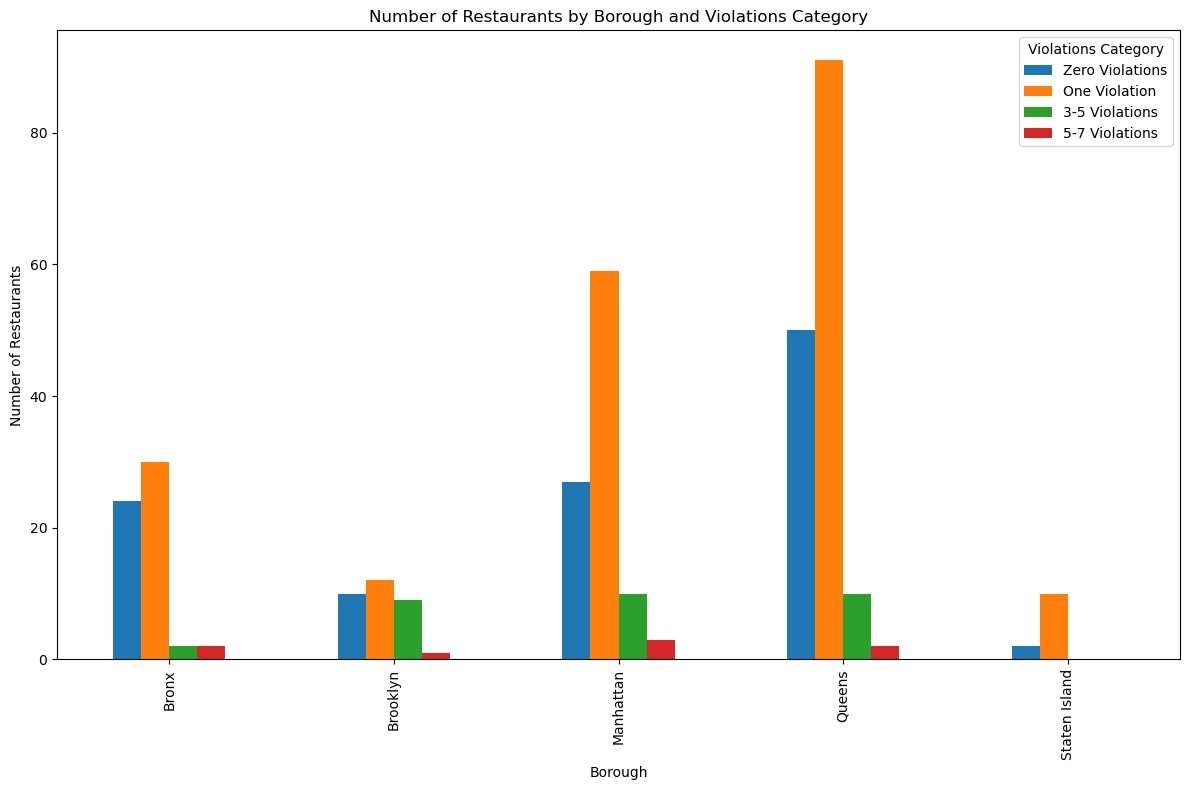

In [271]:
# Group by 'borough' and 'violations_category', then count the number of restaurants in each group
violations_count = clean_grade_unique2.groupby(['BORO', 'violations_category']).size().unstack(fill_value=0)

# Plotting the clustered bar chart
violations_count.plot(kind='bar', figsize=(12, 8))

# Add title and labels
plt.title('Number of Restaurants by Borough and Violations Category')
plt.xlabel('Borough')
plt.ylabel('Number of Restaurants')

# Add legend
plt.legend(title='Violations Category')

# Show plot
plt.tight_layout()
plt.show()

In [272]:
violations_count.head()

violations_category,Zero Violations,One Violation,3-5 Violations,5-7 Violations
BORO,,,,
Bronx,24,30,2,2
Brooklyn,10,12,9,1
Manhattan,27,59,10,3
Queens,50,91,10,2
Staten Island,2,10,0,0


In [273]:
#Perform chi-square test
chi2, p, dof, expected = chi2_contingency(violations_count)

# Print results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")


Chi-square statistic: 26.662529352336794
P-value: 0.00863906744954606
Degrees of freedom: 12


BEGIN RAT DATA DO NOT PUT PIZZA DATA BELOW

In [274]:
ratpath= Path("rat_sightings.csv")
ratfile=pd.read_csv(ratpath,encoding="UTF-8")
ratfile.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,9/4/2015 0:00,9/18/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,9/4/2015 0:00,10/28/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,9/4/2015 0:00,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,9/4/2015 0:00,9/14/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,9/4/2015 0:00,9/22/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


In [275]:
ratfile.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [276]:
#came up with way to easily filter the main DF by columns. This can easily be amended by adding column titles to columns_to_keep and rerunning the block.
#i took facility type out Facililty Type because it is only Nans. scroll down to see output confirming.
columns_to_keep=['Borough','Incident Zip','Created Date','Location Type','City','Status','Complaint Type']
clean_rats_df=ratfile[columns_to_keep].copy()
clean_rats_df

,Borough,Incident Zip,Created Date,Location Type,City,Status,Complaint Type
0,MANHATTAN,10006.0,9/4/2015 0:00,3+ Family Mixed Use Building,NEW YORK,Closed,Rodent
1,STATEN ISLAND,10306.0,9/4/2015 0:00,Commercial Building,STATEN ISLAND,Closed,Rodent
2,STATEN ISLAND,10310.0,9/4/2015 0:00,1-2 Family Dwelling,STATEN ISLAND,Assigned,Rodent
3,BROOKLYN,11206.0,9/4/2015 0:00,3+ Family Apt. Building,BROOKLYN,Closed,Rodent
4,BRONX,10462.0,9/4/2015 0:00,3+ Family Mixed Use Building,BRONX,Closed,Rodent
...,...,...,...,...,...,...,...
101909,BROOKLYN,11207.0,2/15/2017 0:00,3+ Family Mixed Use Building,BROOKLYN,Pending,Rodent
101910,BROOKLYN,11233.0,2/14/2017 0:00,3+ Family Apt. Building,BROOKLYN,Closed,Rodent
101911,BROOKLYN,11213.0,2/14/2017 0:00,3+ Family Mixed Use Building,BROOKLYN,Closed,Rodent
101912,QUEENS,11105.0,2/14/2017 0:00,1-2 Family Dwelling,Astoria,Pending,Rodent


In [277]:
#fixed the zip code formatting, had to fill NaNs but we can discuss dropping them maybe? Im having trouble picturing how it will effect the final project.
#next we need to run that code on the date here, i cant seem to locate it
clean_rats_df['Incident Zip'].fillna(0,inplace=True)
clean_rats_df['Incident Zip'] = clean_rats_df['Incident Zip'].astype(int)
clean_rats_df['Created Date'] = pd.to_datetime(clean_rats_df['Created Date']).dt.date
clean_rats_df['Date']=clean_rats_df['Created Date']
clean_rats_df['ZIPCODE']=clean_rats_df['Incident Zip']
clean_rats_df

,Borough,Incident Zip,Created Date,Location Type,City,Status,Complaint Type,Date,ZIPCODE
0,MANHATTAN,10006,2015-09-04,3+ Family Mixed Use Building,NEW YORK,Closed,Rodent,2015-09-04,10006
1,STATEN ISLAND,10306,2015-09-04,Commercial Building,STATEN ISLAND,Closed,Rodent,2015-09-04,10306
2,STATEN ISLAND,10310,2015-09-04,1-2 Family Dwelling,STATEN ISLAND,Assigned,Rodent,2015-09-04,10310
3,BROOKLYN,11206,2015-09-04,3+ Family Apt. Building,BROOKLYN,Closed,Rodent,2015-09-04,11206
4,BRONX,10462,2015-09-04,3+ Family Mixed Use Building,BRONX,Closed,Rodent,2015-09-04,10462
...,...,...,...,...,...,...,...,...,...
101909,BROOKLYN,11207,2017-02-15,3+ Family Mixed Use Building,BROOKLYN,Pending,Rodent,2017-02-15,11207
101910,BROOKLYN,11233,2017-02-14,3+ Family Apt. Building,BROOKLYN,Closed,Rodent,2017-02-14,11233
101911,BROOKLYN,11213,2017-02-14,3+ Family Mixed Use Building,BROOKLYN,Closed,Rodent,2017-02-14,11213
101912,QUEENS,11105,2017-02-14,1-2 Family Dwelling,Astoria,Pending,Rodent,2017-02-14,11105


In [278]:
#get the number of places closed due to violations by borough.
closed_df=clean_rats_df[clean_rats_df['Status']=='Closed'].groupby('Borough').size()
closed_df

Borough
BRONX            13879
BROOKLYN         26551
MANHATTAN        17818
QUEENS           11805
STATEN ISLAND     3972
dtype: int64

<Axes: xlabel='Borough'>

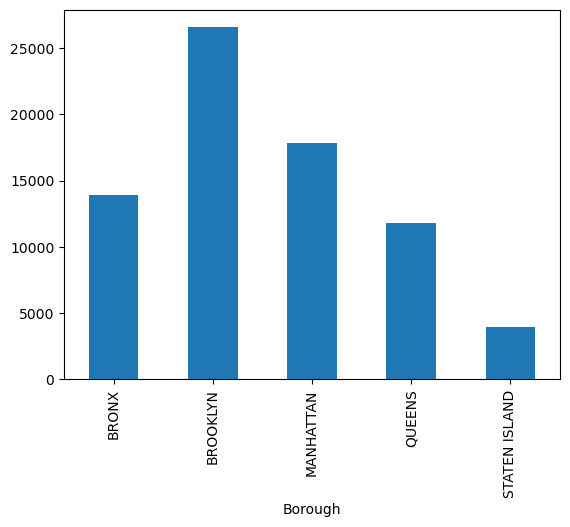

In [279]:
#bar graph of closures by borough
closed_df.plot(kind='bar')

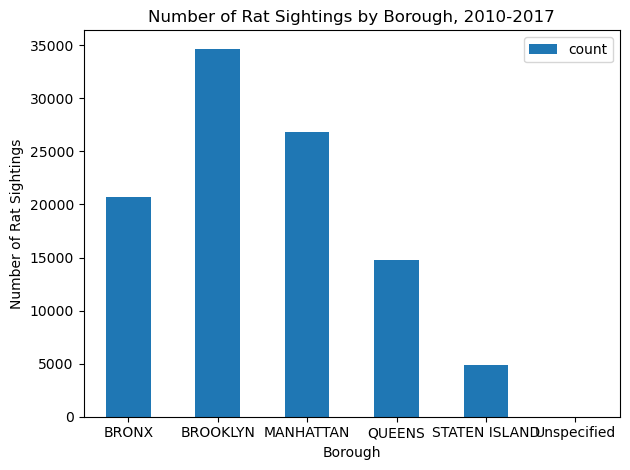

In [280]:
#QUESTION 4: Do certain Boroughs have more rat sightings?
ratcounting=  clean_rats_df.groupby(['Borough']).size().reset_index(name='count')

ratcounting.plot(kind='bar', x='Borough', y='count')
plt.xlabel('Borough')
plt.ylabel('Number of Rat Sightings')
plt.title('Number of Rat Sightings by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

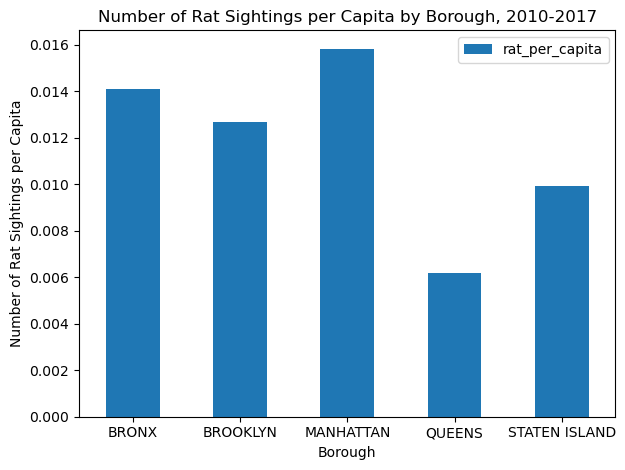

In [281]:
#consider per capita data. Find population and divide the rat sightings by the number of people.
ratcounting = clean_rats_df.groupby(['Borough']).size().reset_index(name='count')

# Your population data
borough_pops = pd.DataFrame({'Borough': ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
                             'Population': [1471160, 2736074, 1694251, 2405464, 495747]})

# Merge rat sightings data with population data
ratcounting = ratcounting.merge(borough_pops, on='Borough')

# Calculate rat sightings per capita
ratcounting['rat_per_capita'] = ratcounting['count'] / ratcounting['Population']

# Plotting
ratcounting.plot(kind='bar', x='Borough', y='rat_per_capita')
plt.xlabel('Borough')
plt.ylabel('Number of Rat Sightings per Capita')
plt.title('Number of Rat Sightings per Capita by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [282]:
#QUESTION 4a: Do certain zip codes have more rat sightings?
clean_rats_df['ZIPCODE']=clean_rats_df['ZIPCODE'].astype(str)
rat_burroughs = clean_rats_df[clean_rats_df['ZIPCODE'].str.len() == 5]
#rat_burroughs=clean_rats_df[clean_rats_df['Complaint Type']=='Rodent'].groupby('ZIPCODE').size()
rat_burroughs.groupby('ZIPCODE').size()

ZIPCODE
10000       3
10001     383
10002    1299
10003     627
10004      40
         ... 
11436     231
11691     214
11692      76
11693      65
11694      72
Length: 188, dtype: int64

In [283]:

#create high, med, low rat sightings
rat_burroughs_df=rat_burroughs.groupby('ZIPCODE').size()
rat_burroughs_df



ZIPCODE
10000       3
10001     383
10002    1299
10003     627
10004      40
         ... 
11436     231
11691     214
11692      76
11693      65
11694      72
Length: 188, dtype: int64

In [284]:
rat_burroughs_df.describe()

count     188.000000
mean      540.186170
std       544.421807
min         1.000000
25%       162.750000
50%       359.500000
75%       754.000000
max      3124.000000
dtype: float64

In [285]:
rat_bins = [1, 162,754, 3124]

# # Create the names for the five bins
group_names = ["Low Rat Conentration", "Average Rat Concentration", "High Rat Concentration"]
# count number of rat sightings per zipcode
# categorize each zip codes as high medium and low
pd.cut(rat_burroughs_df,bins=rat_bins,labels=group_names)

ZIPCODE
10000         Low Rat Conentration
10001    Average Rat Concentration
10002       High Rat Concentration
10003    Average Rat Concentration
10004         Low Rat Conentration
                   ...            
11436    Average Rat Concentration
11691    Average Rat Concentration
11692         Low Rat Conentration
11693         Low Rat Conentration
11694         Low Rat Conentration
Length: 188, dtype: category
Categories (3, object): ['Low Rat Conentration' < 'Average Rat Concentration' < 'High Rat Concentration']

In [290]:
rat_burroughs_df = pd.DataFrame(rat_burroughs_df)

# Reset index and rename columns
rat_burroughs_df = rat_burroughs_df.reset_index()
rat_burroughs_df.columns = ['zipcode', 'ratconcentration']

# Display the DataFrame
print(rat_burroughs_df)

    zipcode  ratconcentration
0     10000                 3
1     10001               383
2     10002              1299
3     10003               627
4     10004                40
..      ...               ...
183   11436               231
184   11691               214
185   11692                76
186   11693                65
187   11694                72

[188 rows x 2 columns]


In [292]:
rat_burroughs_df['ZIPCODE'] = rat_burroughs_df['zipcode'].astype(str)


In [ ]:
merged_df=pd.merge(clean_grade_df,clean_rats_df, on='Date')



In [ ]:
zip_merge=pd.merge(clean_grade_df,clean_rats_df, on='ZIPCODE')

ValueError: You are trying to merge on int32 and object columns for key 'ZIPCODE'. If you wish to proceed you should use pd.concat

In [ ]:
#clean_rats_df.columns


In [ ]:
gradecounts= clean_grade_df.groupby(['BORO', 'GRADE']).size().reset_index(name='count')

Boroughs = gradecounts['BORO']
counts = gradecounts['count']
grades = gradecounts['GRADE']

transposecounts = gradecounts.pivot(index='BORO', columns='GRADE', values='count').fillna(0)

transposecounts.plot(kind='bar', stacked=True)
plt.xlabel('Borough')
plt.ylabel('Number of Restaurant Grades')
plt.title('Number of Restaurant Grades by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [ ]:
clean_grade_df

In [ ]:
ratcounting=  clean_rats_df.groupby(['Borough']).size().reset_index(name='count')

#ratboroughs = ratcounting['Borough']
#ratcounts = ratcounting.groupby('Borough').count()['Complaint Type']


#rattransposecounts = ratcounting.pivot(index='Borough', columns=ratboroughs, values=ratcounts).fillna(0)

ratcounting.plot(kind='bar', x='Borough', y='count')
plt.xlabel('Borough')
plt.ylabel('Number of Rat Sightings')
plt.title('Number of Rat Sightings by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [ ]:
#consider per capita data. Find population and divide the rat sightings by the number of people.
ratcounting = clean_rats_df.groupby(['Borough']).size().reset_index(name='count')

# Your population data
borough_pops = pd.DataFrame({'Borough': ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
                             'Population': [1471160, 2736074, 1694251, 2405464, 495747]})

# Merge rat sightings data with population data
ratcounting = ratcounting.merge(borough_pops, on='Borough')

# Calculate rat sightings per capita
ratcounting['rat_per_capita'] = ratcounting['count'] / ratcounting['Population']

# Plotting
ratcounting.plot(kind='bar', x='Borough', y='rat_per_capita')
plt.xlabel('Borough')
plt.ylabel('Number of Rat Sightings per Capita')
plt.title('Number of Rat Sightings per Capita by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [ ]:
borough_pops=pd.Series([{'BRONX':1471160},
                {'BROOKLYN':2736074},
                {'MANHATTAN':1694251},
                {'QUEENS':2405464},
                {'STATEN ISLAND':495747}])
borough_pops

In [ ]:
dict_lis=[{'BRONX':1471160},
                {'BROOKLYN':2736074},
                {'MANHATTAN':1694251},
                {'QUEENS':2405464},
                {'STATEN ISLAND':495747}]

In [ ]:
[dict_lis]

In [ ]:
borough_count=clean_rats_df['Borough'].value_counts()
borough_count.pop('Unspecified')

In [ ]:
borough_count['BROOKLYN']